![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación librerías
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


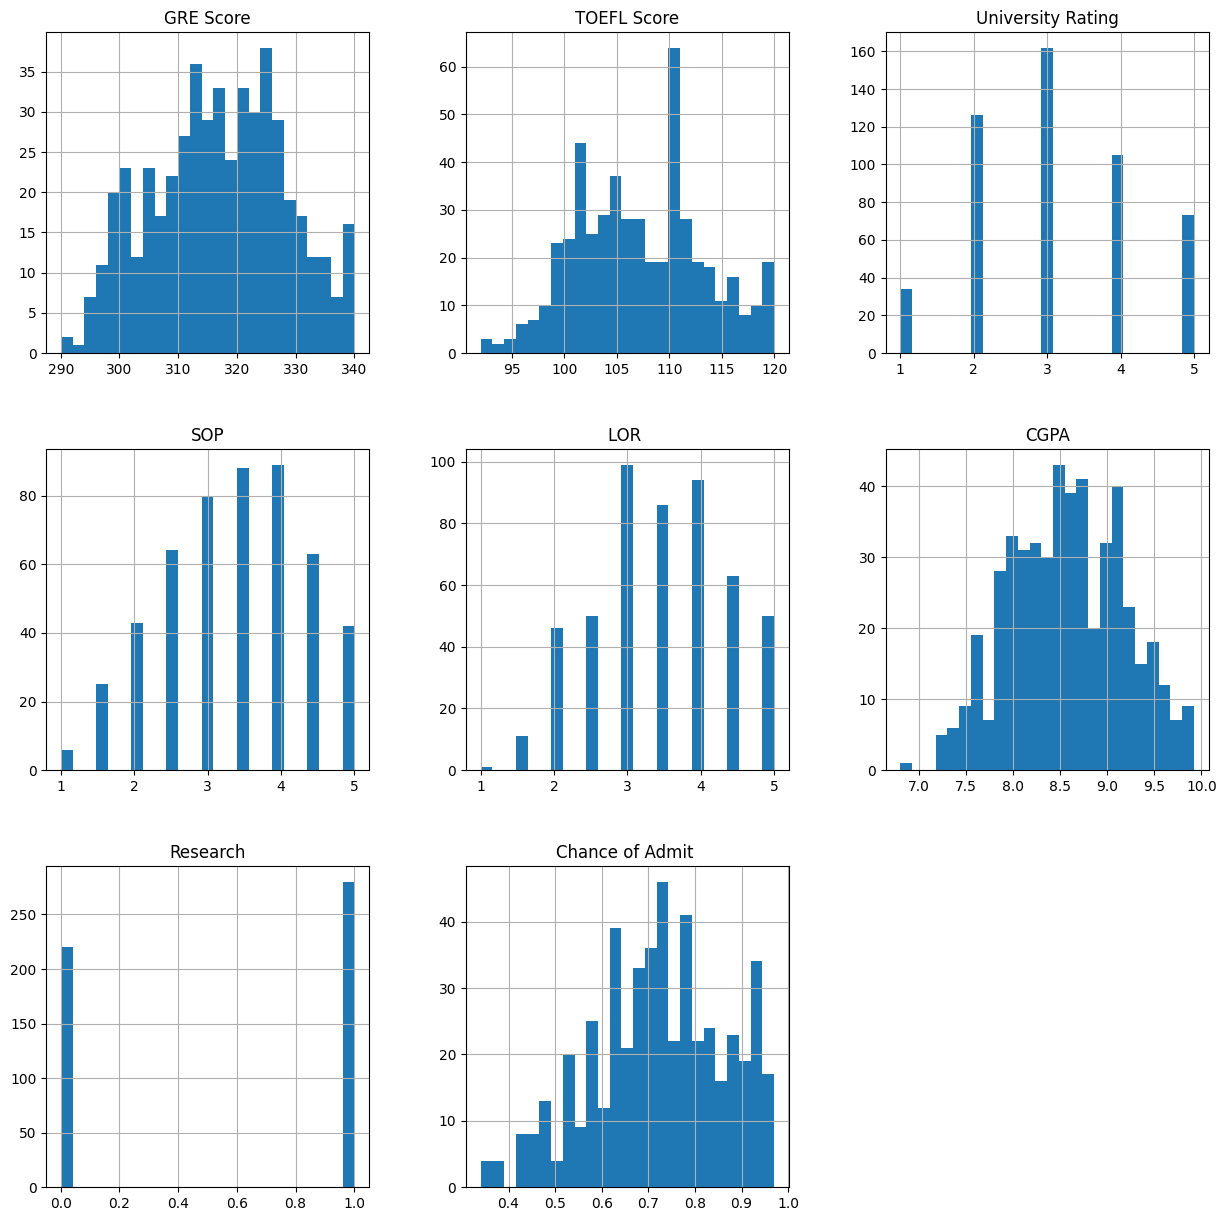

In [ ]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [ ]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [ ]:
print(Y.shape)

(500,)


In [ ]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
xTrain = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

#xTrain = np.array(xTrain)
#yTrain = np.array(yTrain)

#xTest = np.array(xTest)
#yTest = np.array(yTest)

In [ ]:
x_train_array = xTrain.values
x_test_array = xTest.values
y_train_array = yTrain.values
y_test_array = yTest.valuesx_train_array = xTrain.values
x_test_array = xTest.values
y_train_array = yTrain.values
y_test_array = yTest.values

In [ ]:
xTrain = np.array(x_train_array)
xTest = np.array(x_test_array)
yTrain = y_train_array.reshape(-1, 1)
yTest = y_test_array.reshape(-1, 1)

In [ ]:
output_var = yTrain.shape[1]
print(output_var, ' output variables')

1  output variables


In [ ]:
# Definición de dimensiones de entrada, varaibles predictoras
dims = xTrain.shape[1]
print(dims, 'input variables')

7 input variables


## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
!pip install livelossplot

In [ ]:
# Importación librerías
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts
from keras.optimizers import Adam

In [ ]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model1 = Sequential()

#una capa
model1.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8 (32.00 Byte)
Trainable params: 8 (32.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model1.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

En este caso hemos decidido usar el optimizador ADAM, ya que a pesar de ser un modelo de una sola capa, ADAM converge mas rapido,estable y requiere de menos ajustes manuales.

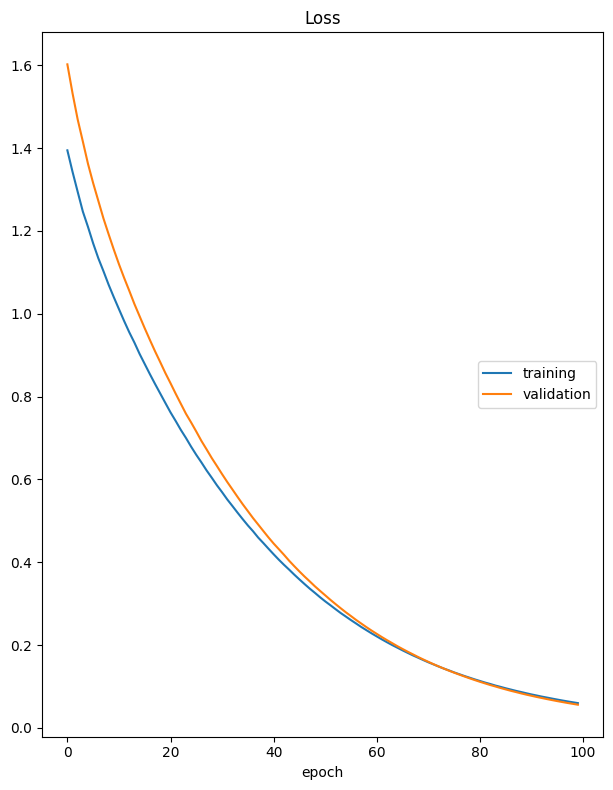

Loss
	training         	 (min:    0.060, max:    1.395, cur:    0.060)
	validation       	 (min:    0.056, max:    1.602, cur:    0.056)
11/11 [==============================] - 0s 46ms/step - loss: 0.0598 - val_loss: 0.0560


In [ ]:
# Entrenamiento de la red neuronal con 50 épocas
model1.fit(xTrain, yTrain,
          verbose=1,
          epochs=100,
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred1 = model1.predict(xTest)
mae1 = mean_absolute_error(yTest, y_pred1)
mse1 = mean_squared_error(yTest, y_pred1)

print(f"Mean Absolute Error (MAE): {mae1}")
print(f"Mean Squared Error (MSE): {mse1}")

5/5 [==============================] - 0s 3ms/step
Mean Absolute Error (MAE): 0.18972926793098446
Mean Squared Error (MSE): 0.05596482445556891


Podemos ver en la grafica que tanto la perdida de entrenamiento como la de validacion disminuyen de manera significativa y convergen hacia un valor bajo, lo que indica que el modelo esta aprendiendo efectivamente de los datos de entrenamiento y validacon sin mostrar overfitting.

 Otra observacion importante es que ambas curvas convergen, sugiriendo que el modelo generaliza bien los datos nuevos y no solo se esta memorizando los datos de entrenamiento.

 La 100 epocas escogidas para este modelo permitieron al modelo aprender adecuadamente sin senales de sobre ajuste, ya que la perdida de validacion se mantuvo baja y estable en conjunto con la perdida de entrenamiento.

 En cuanto a las metricas de evaluacion, podemos observar que un MSE de 0.056, sugiere que los errores no son muy grandes, sin embargo dado que los valores que queremos predecir son las probabilidades de ser admitido van de 0 a 1, un MAE de 0.19 se considera moderadamente alto.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Celda 2
def crear_compilar_modelo(neuronas, dims,output_var):
    K.clear_session()
    model = Sequential()
    model.add(Dense(neuronas, activation='relu', input_shape=(dims,)))
    model.add(Dense(output_var, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])
    return model

neuronas = [30, 60, 128, 256]

resultados = {}

for neu in neuronas:
    model2 = crear_compilar_modelo(neu, dims,output_var)
    model2.fit(xTrain, yTrain, epochs=100, verbose=0)
    scores = model2.evaluate(xTest, yTest, verbose=0)
    resultados[neu] = {'MSE': scores[1], 'MAE': scores[2]}
    print(f"Neuronas: {neu}, MSE: {scores[1]}, MAE: {scores[2]}")

Neuronas: 30, MSE: 0.007643864024430513, MAE: 0.06815949827432632
Neuronas: 60, MSE: 0.005241083912551403, MAE: 0.05492135509848595
Neuronas: 128, MSE: 0.004399568308144808, MAE: 0.04890231415629387
Neuronas: 256, MSE: 0.004265918396413326, MAE: 0.05045720562338829


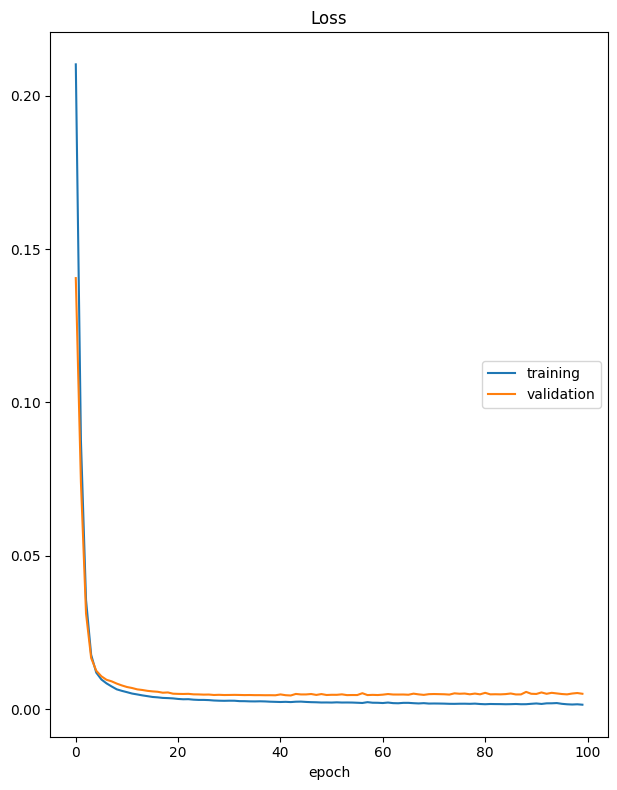

Loss
	training         	 (min:    0.001, max:    0.210, cur:    0.001)
	validation       	 (min:    0.004, max:    0.141, cur:    0.005)
11/11 [==============================] - 0s 47ms/step - loss: 0.0014 - val_loss: 0.0050


In [ ]:
K.clear_session()
model3 = Sequential()
model3.add(Dense(256, activation='relu', input_shape=(dims,)))
model3.add(Dense(output_var, activation='linear'))
model3.compile(optimizer='adam', loss='mean_squared_error')

model3.fit(xTrain, yTrain,
          verbose=1,
          epochs=100,
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

In [ ]:
y_pred2 = model3.predict(xTest)
mae2 = mean_absolute_error(yTest, y_pred2)
mse2 = mean_squared_error(yTest, y_pred2)

print(f"Mean Absolute Error (MAE): {mae2}")
print(f"Mean Squared Error (MSE): {mse2}")

5/5 [==============================] - 0s 4ms/step
Mean Absolute Error (MAE): 0.05261638193130493
Mean Squared Error (MSE): 0.0049868817343350575


 Para este segundo modelo, hicimos un ciclo para probar con distinta cantidades de neuronas en la primera capa y asi poder determinar el mejor modelo con las metricas de medicion. Aunque 128 neuronas también ofrecen buenos resultados, elegir 256 neuronas proporciona al modelo una mejora predictiva.

Tanto el MAE y MSE son notablemente mas bajas, lo que indica que el modelo esta haciendo predicciones con errores mucho menones. En el grafico podemos observar que ambas curvas, de entrenamiento y de validación, muestran una rápida convergencia hacia valores bajos de pérdida, lo cual es indicativo de un buen aprendizaje inicial, posteriormente las curvas se estabilizan y se mantienen bastante planas y cercanas entre sí hacia el final de las 100 épocas. Esto sugiere que el modelo no está sufriendo de sobreajuste significativo, ya que la pérdida de validación sigue de cerca a la pérdida de entrenamiento.

Si podemos ver una pequeña fluctuación en la curva de validación, aunque visible, no es pronunciada ni muestra tendencias crecientes.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Celda 3
K.clear_session()



In [ ]:
model4 = Sequential()

# Agregamos una capa adicional al modelo y luego hacemos un dropout del 10% para ver si mejora el rendimiento
model4.add(Dense(256, input_shape=(dims,), activation='relu'))
model4.add(Dense(128, input_shape=(dims,), activation='relu'))
model4.add(Dropout(0.1))  # Aplica un dropout del 10%

#Salida
model4.add(Dense(output_var, activation='linear'))

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)


In [ ]:
model4.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

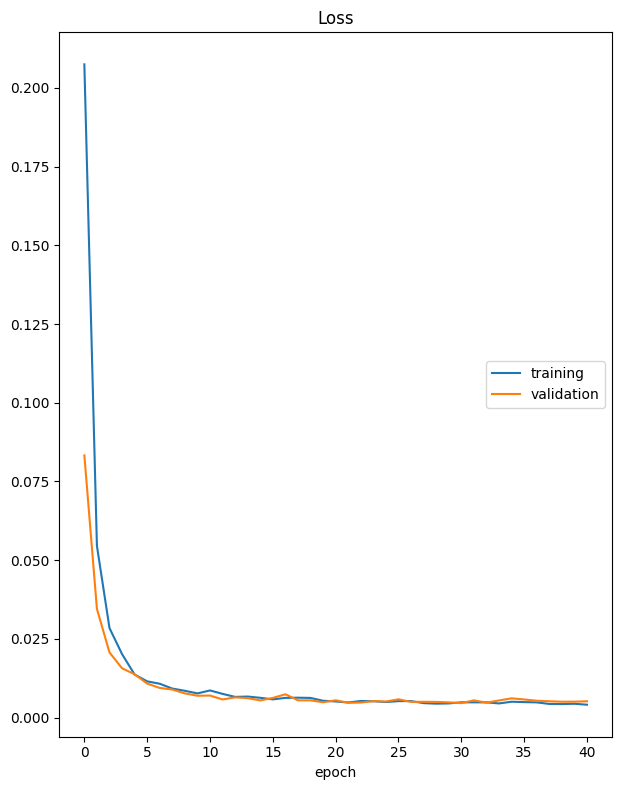

Loss
	training         	 (min:    0.004, max:    0.207, cur:    0.004)
	validation       	 (min:    0.005, max:    0.083, cur:    0.005)
11/11 [==============================] - 1s 51ms/step - loss: 0.0041 - val_loss: 0.0052
Epoch 41: early stopping


In [ ]:
model4.fit(xTrain, yTrain,
          verbose=1,
          epochs=100,
          validation_data=(xTest, yTest),
          callbacks=[early_stopping,PlotLossesKeras()])

In [ ]:
y_pred3 = model4.predict(xTest)
mae3 = mean_absolute_error(yTest, y_pred3)
mse3 = mean_squared_error(yTest, y_pred3)

print(f"Mean Absolute Error (MAE): {mae3}")
print(f"Mean Squared Error (MSE): {mse3}")

5/5 [==============================] - 0s 4ms/step
Mean Absolute Error (MAE): 0.050153264768918356
Mean Squared Error (MSE): 0.004599309113831549


En este modelo decidimos agregar una capa adicional donde aplicamos un dropout del 10% de estas neuronas. El grafico muestra unas perdidas de entrenamiento y validadcion a los largo de 40 epocas, con un early stopping en la epoca 41. Ambas curvas dismunuyen rapidamente y ambas curvas se estabilizan, manteniendose muy cercanas entre si. Existen unas pequenas fluctuaciones pero son menores.

Para el early stopping se configuro una paciencia de 10, lo que quiere decir que a partir de la epoca 31 el modelo alcanzo un punto optimo y no observo mejoras luego de estas 10 epocas adicionales, de esta manera aseguramos que el modelo no haga overfitting y aseguramos con restore_best_weight = True que los pesos se restauren al mejor estado observado.

En cuanto a las metricas de medicion, podimos observar que los valores que el modelo tiene un error medio absoluto de 0.0502 y un MSE de 0.0046, lo cual es consistente con un alto grado de precisión para las probabilidades de ser admitido entre 0 y 1.

Si la probabilidad real de ser admitido es 0.7, un MAE de 0.0502 sugiere que el modelo puede predecir, en promedio, un valor entre 0.6498 y 0.7502. Esto es bastante preciso y util para tomar una decision.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

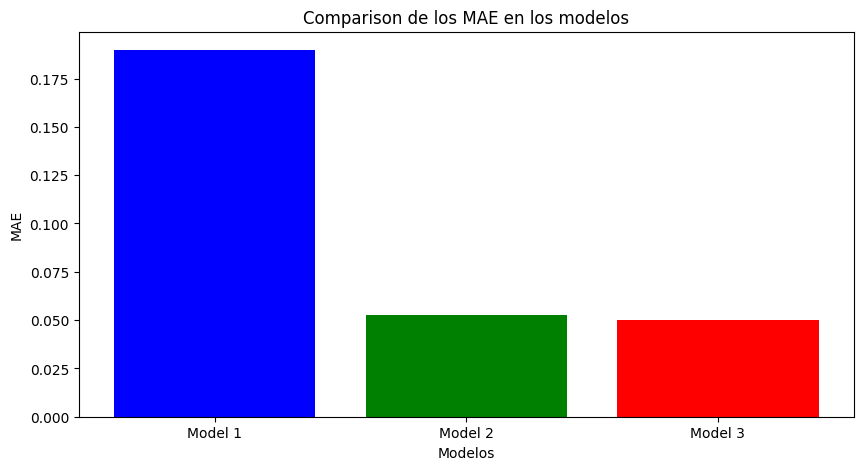

In [ ]:
# Celda 4
import matplotlib.pyplot as plt

mae_values = [mae1, mae2, mae3]
model_names = ['Model 1', 'Model 2', 'Model 3']

plt.figure(figsize=(10, 5))
plt.bar(model_names, mae_values, color=['blue', 'green', 'red'])
plt.xlabel('Modelos')
plt.ylabel('MAE')
plt.title('Comparison de los MAE en los modelos')
plt.show()

Basado en los resultados de MAE y MSE reportados, el ultimo modelo con dos capas, dropout y configuración de early stopping ofrece una ventaja en cuanto a la precision en la prediccion de las probabilidades de ser admitido. El uso de early stopping ha demostrado ser efectivo en prevenir el sobreajuste y en hacer un uso más eficiente de los recursos computacionales. Adicionalemte, una configuracion multicapas, permite capturar mejor la complejidad de los datos.

EN cuanto a la desventaja del modelo con menor desempeno, podemos ver que existe una menor precision a la hora de predecir, un estudiante que debería estar en el umbral de admision (supongamos 0.5) podría ser clasificado erróneamente como no admitido debido al error de predicción  0.5 - 0.19 = 0.31.

Adicionalmente, la ausencia de dropout o configuraciones como early stopping puede hacer que este modelo sea susceptible al sobreajuste o dado su diseño más simple al subajuste, especialmente si la estructura del modelo no es capaz de capturar la complejidad en los datos.